In [1]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 11.7 MB/s eta 0:00:00


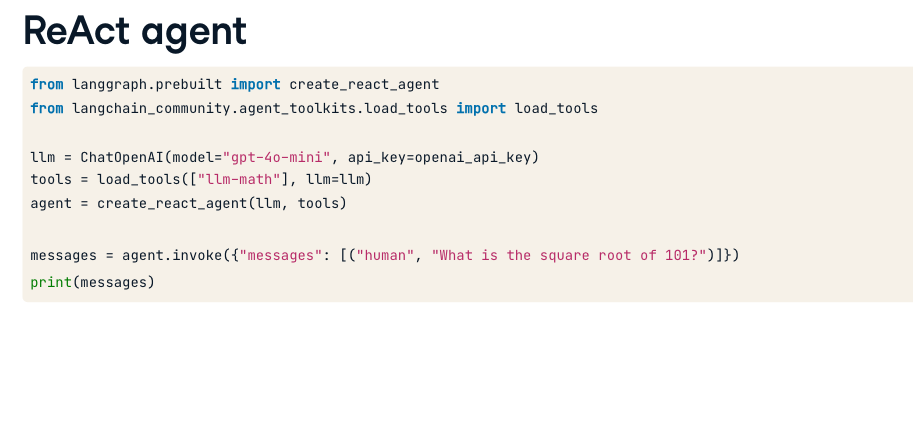

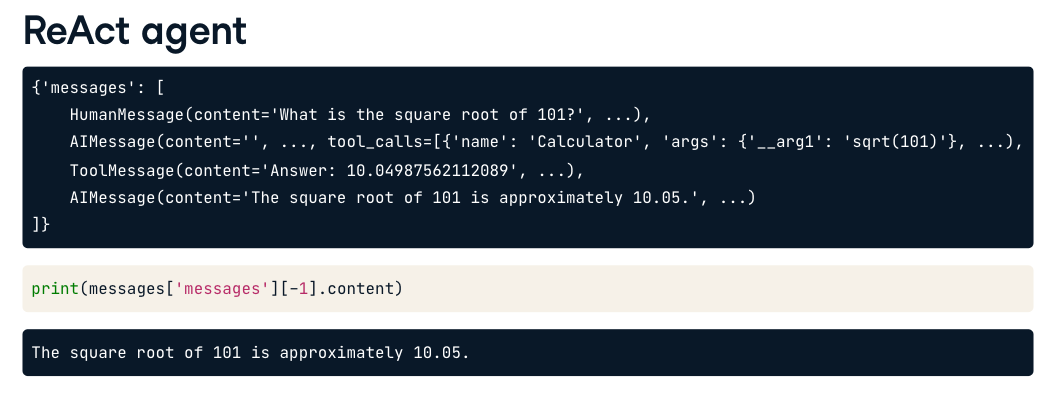

In [ ]:
# Define the tools
tools = load_tools(["wikipedia"])

# Define the agent
agent = create_react_agent(llm, tools)

# Invoke the agent
response = agent.invoke({"messages": [("human", "How many people live in New York City?")]})
print(response)

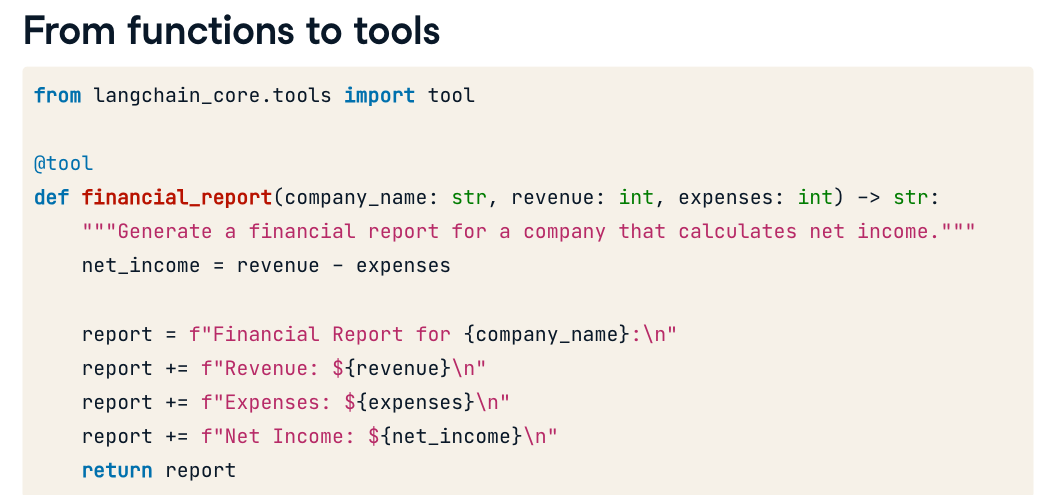

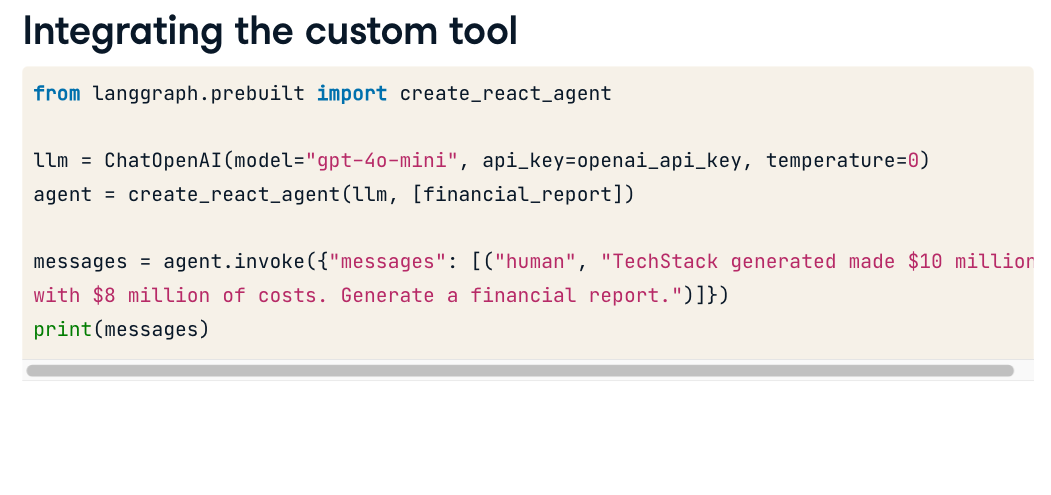

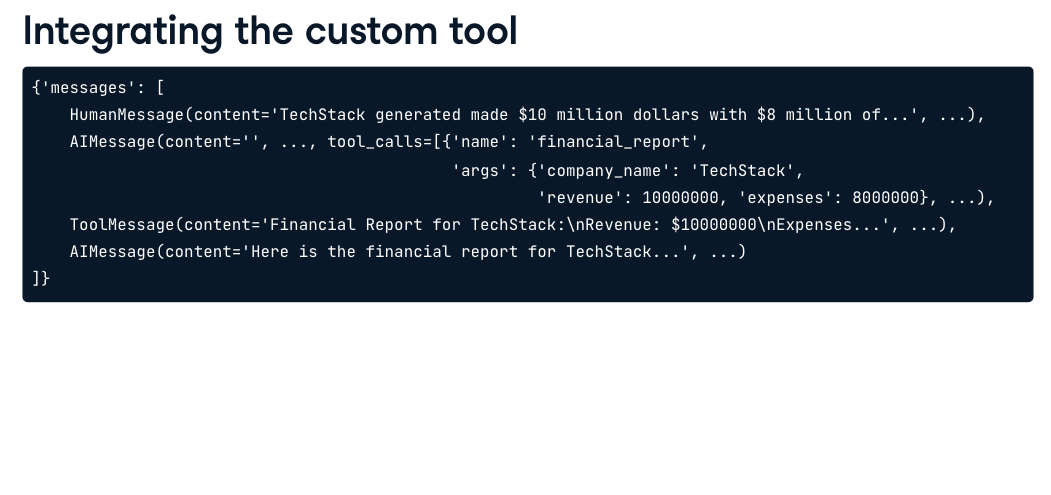

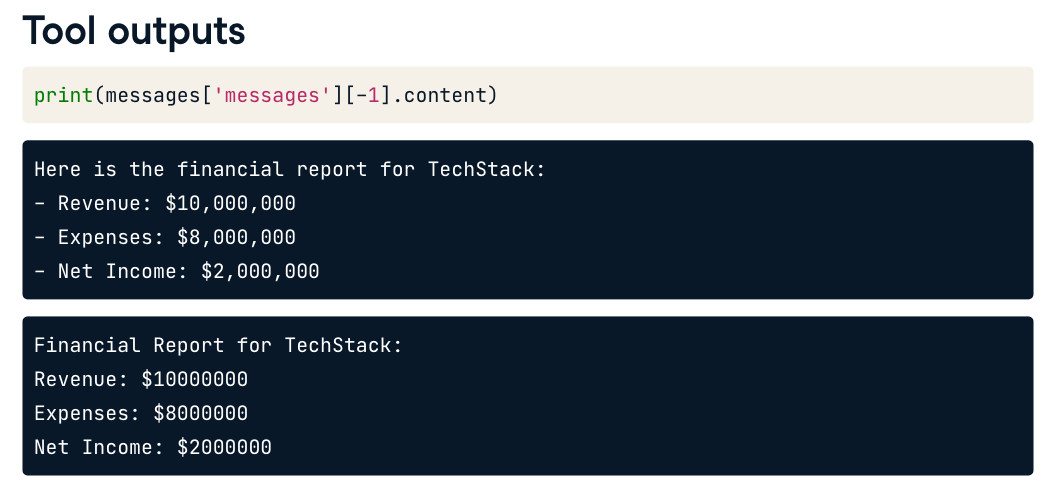

In [ ]:
# Define a function to retrieve customer info by-name
def retrieve_customer_info(name: str) -> str:
    """Retrieve customer information based on their name."""
    # Filter customers for the customer's name
    customer_info = customers[customers['name'] == name]
    return customer_info.to_string()

# Call the function on Peak Performance Co.
print(retrieve_customer_info("Peak Performance Co."))

In [ ]:
# Convert the retrieve_customer_info function into a tool
@tool
def retrieve_customer_info(name: str) -> str:
    """Retrieve customer information based on their name."""
    customer_info = customers[customers['name'] == name]
    return customer_info.to_string()

# Print the tool's arguments
print(retrieve_customer_info.args)

In [ ]:
@tool
def retrieve_customer_info(name: str) -> str:
    """Retrieve customer information based on their name."""
    customer_info = customers[customers['name'] == name]
    return customer_info.to_string()

# Create a ReAct agent
agent = create_react_agent(llm,[retrieve_customer_info])

# Invoke the agent on the input
messages = agent.invoke({"messages": [("human", "Create a summary of our customer: Peak Performance Co.")]})
print(messages['messages'][-1].content)